In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
panel = pd.read_pickle('../Data/returns_chars_panel.pkl') 
macro = pd.read_pickle('../Data/macro_timeseries.pkl') 

In [9]:
panel.head()

,date,permno,excess_ret,ret,rfree,mvel1,beta,betasq,chmom,dolvol,...,stdacc,stdcf,ms,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade
0,1986-02-01,10000,-0.262610,-0.257143,0.005467,-0.375440,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.572822,0.361538,0.938929,0.873640,0.399871,0.120000,-0.177810
1,1986-03-01,10000,0.360335,0.365385,0.005050,-0.496811,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.417504,0.520205,-0.138898,0.328870,0.078782,-0.411202,0.130393
2,1986-04-01,10000,-0.103717,-0.098592,0.005125,-0.401783,0.0,0.0,0.0,-0.521182,...,0.0,0.0,0.0,0.091488,0.329401,0.813365,0.660035,0.142035,-0.131985,0.119017
3,1986-05-01,10000,-0.227831,-0.222656,0.005175,-0.435735,0.0,0.0,0.0,-0.439391,...,0.0,0.0,0.0,0.329949,0.438295,-0.683852,-0.759048,0.388029,-0.199555,0.135402
4,1986-06-01,10000,-0.009883,-0.005025,0.004858,-0.534203,0.0,0.0,0.0,-0.499678,...,0.0,0.0,0.0,0.510140,0.610586,0.724257,0.608819,-0.128302,-0.025964,0.007879


In [10]:
pd.set_option('display.max_rows', None)
panel_descriptives = panel.describe()
print(panel_descriptives.T[['count','min','50%','max']])

                     count           min           50%           max
permno           3739449.0  10000.000000  61778.000000  93436.000000
excess_ret       3739449.0     -1.012517     -0.003450     23.996800
ret              3739449.0     -1.000000      0.000000     24.000000
rfree            3739449.0      0.000008      0.004117      0.013583
mvel1            3739449.0     -0.999781      0.001033      1.000000
beta             3739449.0     -0.999195      0.000000      1.000000
betasq           3739449.0     -0.999755      0.000000      1.000000
chmom            3739449.0     -0.999200      0.000000      1.000000
dolvol           3739449.0     -0.999777      0.000000      1.000000
idiovol          3739449.0     -0.999755      0.000000      1.000000
indmom           3739449.0     -0.999291      0.000000      1.000000
mom1m            3739449.0     -0.999191      0.000000      1.000000
mom6m            3739449.0     -0.999185      0.000000      1.000000
mom12m           3739449.0     -0.

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

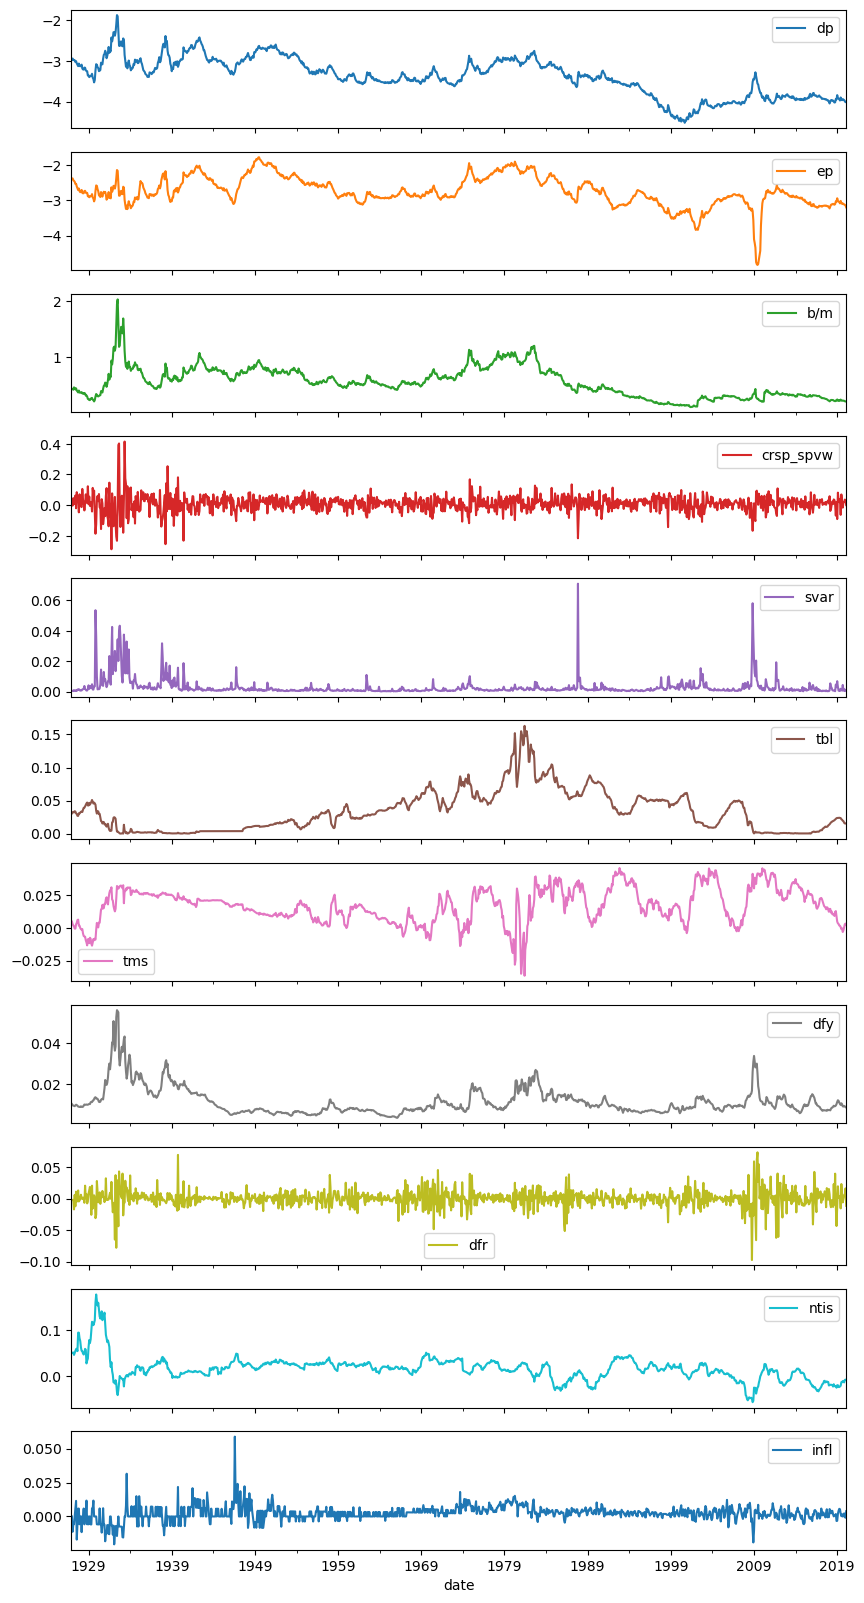

In [11]:
macro.set_index('date').plot(subplots=True,figsize=(10,20))

# Description 
1. Not rolling window, just one window 

In [12]:
# combine micro and macro data
df = pd.merge(panel,macro,on='date',how='left',suffixes=['','_macro']) 

# features + targets 
X = df.drop(columns=['ret','excess_ret','rfree','permno','date']) # everything except return info and IDs
y = df['excess_ret'] 

# make 20 years of training data
date = df['date']
training = (date <= '1977-03') # selects 
X_train, y_train = X.loc[training].values, y.loc[training].values 

# make 10 years of validation data
validation = (date > '1977-03') & (date <= '1987-03') 
X_val, y_val = X.loc[validation].values, y.loc[validation].values 

# make test data
test = (date > '1987-03') 
X_test, y_test = X.loc[test].values, y.loc[test].values 

/Users/dhammatornriewcharoon/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │         3,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,553 (13.88 KB)

 Trainable params: 3,489 (13.63 KB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/100
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1493 - mse: 0.1456 - val_loss: 0.0321 - val_mse: 0.0288
Epoch 2/100
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0219 - mse: 0.0187 - val_loss: 0.0300 - val_mse: 0.0271
Epoch 3/100
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0210 - mse: 0.0183 - val_loss: 0.0293 - val_mse: 0.0269
Epoch 4/100
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0204 - mse: 0.0181 - val_loss: 0.0289 - val_mse: 0.0269
Epoch 5/100
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0198 - mse: 0.0179 - val_loss: 0.0283 - val_mse: 0.0268
Epoch 6/100
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0193 - mse: 0.0178 - val_loss: 0.0278 - val_mse: 0.0267
Epoch 7/100
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0188 - mse: 0.0178 - val_loss: 0.0275 - val_mse: 0.0267
Epoch 8/100
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0185 - mse: 0.0177 - val_loss: 0.0274 - val_mse: 0.0267
Epoch 9/100
1188/1188 ━━━━━━━━━━

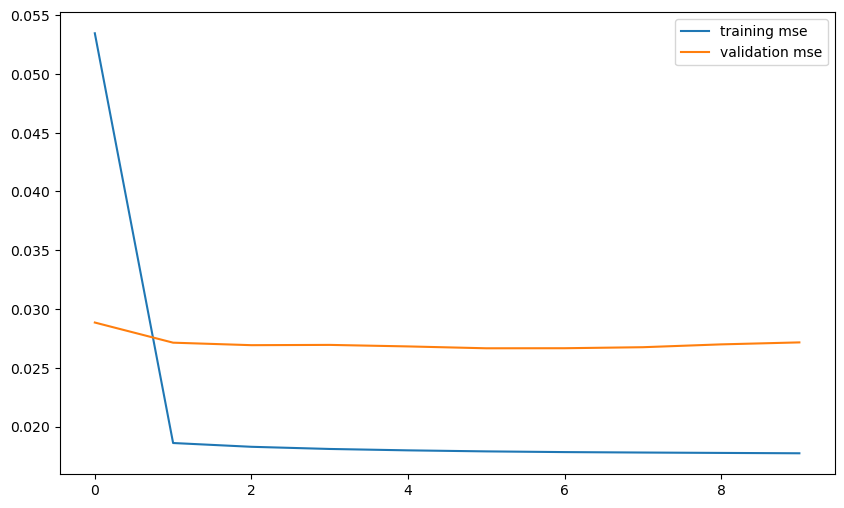

In [14]:
import tensorflow as tf
tf.random.set_seed(999)
from tensorflow.keras.models import Sequential
# Dense is the fully connected layer 
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.regularizers import L1
from tensorflow.keras.callbacks import EarlyStopping

# hypers
batch_size = 512
learning_rate = 1e-4
lamda = 1e-5
patience = 2

# model architecture
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], 
                activation='relu',
                kernel_regularizer = L1(lamda), 
                # initilizing the weight and bias with normal distribution with special condition 
                kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
# Output layer 
model.add(Dense(1, activation='linear',
                kernel_regularizer = L1(lamda), 
                kernel_initializer = 'he_normal'))

model.compile(loss='mse', 
              optimizer='Adam',
              metrics = ['mse'])

model.summary()

history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=batch_size, 
                    verbose=True,
                    validation_data = (X_val, y_val),
                    # Defined the callback to see if the validation result actually improves 
                    callbacks = [EarlyStopping(patience = patience, restore_best_weights=True)])

fig, ax = plt.subplots(figsize=(10,6))
pd.Series(history.history['mse']).plot(ax=ax, label='training mse')
pd.Series(history.history['val_mse']).plot(ax=ax, label='validation mse')
ax.legend()

In [9]:
%%time

def fit_nn1(batch_size,learning_rate,lamda,patience):

    # model architecture
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], 
                    activation='relu',
                    kernel_regularizer = L1(lamda), 
                    kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='linear',
                    kernel_regularizer = L1(lamda), 
                    kernel_initializer = 'he_normal'))

    model.compile(loss='mse', 
                  optimizer='Adam',
                  metrics = ['mse'])

    history = model.fit(X_train, y_train, 
                        epochs=100, 
                        batch_size=batch_size, 
                        verbose=False,
                        validation_data = (X_val, y_val),
                        callbacks = [EarlyStopping(patience = patience, restore_best_weights=True)])

    return history


lamda_grid = [10**(-k) for k in range(0,5)]
val_mse = []
for lamda in lamda_grid:
    print('fitting with lamda = %f' % lamda)
    tf.random.set_seed(999)
    history = fit_nn1(batch_size,learning_rate,lamda)
    val_mse.append(history.history['val_mse'][-1])

fitting with lamda = 1.000000
fitting with lamda = 0.100000
fitting with lamda = 0.010000
fitting with lamda = 0.001000
fitting with lamda = 0.000100
CPU times: user 1min 16s, sys: 15.2 s, total: 1min 32s
Wall time: 48.6 s


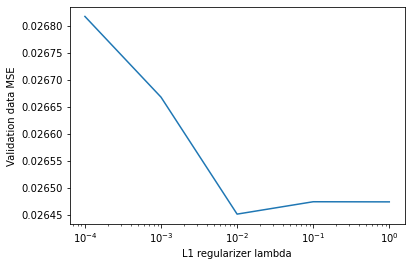

In [55]:
plt.plot(lamda_grid,val_mse)
plt.xlabel('L1 regularizer lambda')
plt.ylabel('Validation data MSE')
plt.xscale('log')

# left side is overfitting -> not penalized enough
# right side is underfitting  